<a href="https://colab.research.google.com/github/dolphin1404/AI_lab/blob/main/LAB-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Regression Tutorial

This tutorial demonstrates a simple linear regression using PyTorch.
We'll predict house prices using the California Housing dataset.

**Learning Objectives:**
- Understand basic PyTorch workflow
- Build a simple neural network for regression
- Train and evaluate the model
- Visualize results

## 1. Import Libraries

Import necessary libraries for data processing, model building, and visualization.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd # Added pandas for data manipulation
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kagglehub # Added kagglehub to download datasets

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")

Using device: cuda
PyTorch version: 2.8.0+cu126


## 2. Load and Explore Data

Load the California Housing dataset and explore its structure.

In [2]:
# 캐글 허브 사용
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

csv_file_path = f"{path}/kc_house_data.csv"

# pandas 사용함
df = pd.read_csv(csv_file_path)

print("Dataset Information:")
print(f"Original number of samples: {df.shape[0]}")
print(f"Original number of features: {df.shape[1]}")
print(f"\nFirst 5 rows of the dataset:")
display(df.head())

# Extract features (X) and target (y)
# price 예측해야함

target_column = 'price'
# id, date는 필요없음
# 특징에서 해당 열 제거
features = df.drop(columns=['id', 'date', target_column])

X = features.values
y = df[target_column].values

print(f"\nNumber of samples after processing: {X.shape[0]}")
print(f"Number of features after processing: {X.shape[1]}")
print(f"\nFeature names: {list(features.columns)}")
print(f"Target: {target_column} (in dollars)")

# Display statistics for the target
print(f"\nTarget statistics:")
print(f"  Min: ${y.min():,.2f}")
print(f"  Max: ${y.max():,.2f}")
print(f"  Mean: ${y.mean():,.2f}")

Using Colab cache for faster access to the 'housesalesprediction' dataset.
Dataset Information:
Original number of samples: 21613
Original number of features: 21

First 5 rows of the dataset:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



Number of samples after processing: 21613
Number of features after processing: 18

Feature names: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Target: price (in dollars)

Target statistics:
  Min: $75,000.00
  Max: $7,700,000.00
  Mean: $540,088.14


## 3. Data Preprocessing

Split the data into training and test sets, and normalize features for better training performance.

In [3]:
# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Normalize features using StandardScaler
# This helps neural networks train faster and more stably
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data normalized (mean=0, std=1)")

Training set size: 17290 samples
Test set size: 4323 samples

✓ Data normalized (mean=0, std=1)


## 4. Convert to PyTorch Tensors

Convert NumPy arrays to PyTorch tensors and create DataLoaders for batch processing.

In [4]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders for batch processing
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Batch size: {batch_size}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Batch size: 64
Number of training batches: 271
Number of test batches: 68


## 5. Model Definition

Define a simple feedforward neural network for regression.

**Architecture:**
- Input layer: 8 features
- Hidden layer 1: 64 neurons with ReLU activation
- Hidden layer 2: 32 neurons with ReLU activation
- Output layer: 1 neuron (predicted house price)

In [5]:
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size1=64, hidden_size2=32):
        super(RegressionModel, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, 1)  # Output layer

    def forward(self, x):
        # Forward pass through the network
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Initialize model
input_size = X_train_scaled.shape[1]  # Number of features (8)
model = RegressionModel(input_size).to(device)

print(model)
print(f"\nModel moved to: {device}")

RegressionModel(
  (fc1): Linear(in_features=18, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

Model moved to: cuda


## 6. Loss Function and Optimizer

Define the loss function and optimizer for training.

- **Loss Function:** Mean Squared Error (MSE) - standard for regression
- **Optimizer:** Adam - adaptive learning rate optimizer

In [6]:
# Loss function: Mean Squared Error
criterion = nn.MSELoss()

# Optimizer: Adam with learning rate 0.001
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Loss function: {criterion}")
print(f"Optimizer: Adam")
print(f"Learning rate: {learning_rate}")

Loss function: MSELoss()
Optimizer: Adam
Learning rate: 0.001


## 7. Training Loop

Train the model and track the loss over epochs.

**Training Process:**
1. Forward pass: compute predictions
2. Compute loss: compare predictions with true values
3. Backward pass: compute gradients
4. Update weights: optimize parameters

In [7]:
# Training parameters
num_epochs = 100

# Track losses for visualization
train_losses = []
test_losses = []

print("Starting training...")
print("-" * 60)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Move data to device (GPU if available)
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # 1. Forward pass: compute predictions
        predictions = model(X_batch)

        # 2. Compute loss
        loss = criterion(predictions, y_batch)

        # 3. Backward pass: compute gradients
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Compute new gradients

        # 4. Update weights
        optimizer.step()

        train_loss += loss.item()

    # Average training loss for this epoch
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluation phase (no gradient computation needed)
    model.eval()
    test_loss = 0.0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Train Loss: {avg_train_loss:.4f} | "
              f"Test Loss: {avg_test_loss:.4f}")

print("-" * 60)
print("Training complete!")

Starting training...
------------------------------------------------------------
Epoch [10/100] | Train Loss: 176024243846.1402 | Test Loss: 168707555207.5294
Epoch [20/100] | Train Loss: 67378529408.4723 | Test Loss: 76604276705.8824
Epoch [30/100] | Train Loss: 54645464203.8081 | Test Loss: 62508029650.8235
Epoch [40/100] | Train Loss: 44614982935.6162 | Test Loss: 51327162157.1765
Epoch [50/100] | Train Loss: 38658069938.5387 | Test Loss: 44592301086.1176
Epoch [60/100] | Train Loss: 35355280960.2362 | Test Loss: 41326367066.3529
Epoch [70/100] | Train Loss: 33697841563.8672 | Test Loss: 39452390520.4706
Epoch [80/100] | Train Loss: 32559375367.5572 | Test Loss: 38238103190.5882
Epoch [90/100] | Train Loss: 31872841202.7749 | Test Loss: 37429109760.0000
Epoch [100/100] | Train Loss: 31324293709.4613 | Test Loss: 36818657129.4118
------------------------------------------------------------
Training complete!


## 8. Visualize Training Progress

Plot the training and test losses to see how the model learned over time.

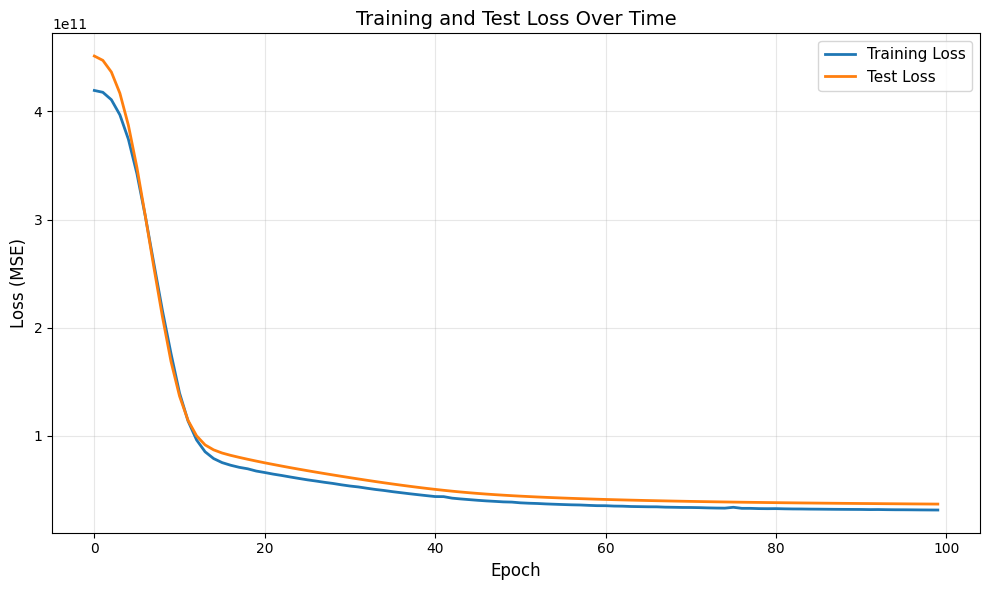

Final Training Loss: 31324293709.4613
Final Test Loss: 36818657129.4118


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', linewidth=2)
plt.plot(test_losses, label='Test Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training and Test Loss Over Time', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Test Loss: {test_losses[-1]:.4f}")

## 9. Model Evaluation

Evaluate the model on the test set and visualize predictions vs actual values.

In [9]:
# Make predictions on test set
model.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    y_pred = model(X_test_device).cpu().numpy()
    y_true = y_test_tensor.numpy()

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

print("Model Performance on Test Set:")
print("=" * 50)
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print("=" * 50)
print(f"\nInterpretation:")
print(f"On average, predictions are off by ${mae * 100000:.2f}")
print(f"Model explains {r2*100:.2f}% of the variance in house prices")

Model Performance on Test Set:
Mean Squared Error (MSE):  36765794304.0000
Root Mean Squared Error (RMSE): 191744.0854
Mean Absolute Error (MAE): 114658.5703
R² Score: 0.7568

Interpretation:
On average, predictions are off by $11465857031.25
Model explains 75.68% of the variance in house prices


## 10. Visualize Predictions

Compare predicted values with actual values to see how well the model performs.

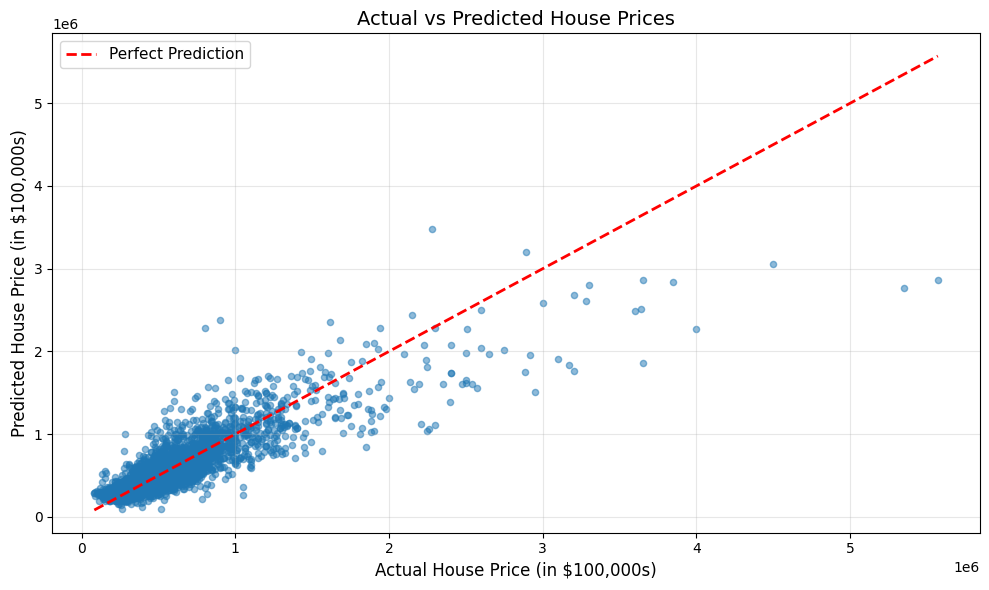


Sample Predictions (first 10 houses):
------------------------------------------------------------
      Actual |    Predicted |   Difference
------------------------------------------------------------
$36,500,000,768 | $38,199,230,464 | $-1,699,229,696
$86,499,999,744 | $82,721,865,728 | $3,778,134,016
$103,799,996,416 | $131,988,996,096 | $-28,188,999,680
$148,999,995,392 | $191,158,927,360 | $-42,158,931,968
$71,099,998,208 | $69,394,235,392 | $1,705,762,816
$21,099,999,232 | $25,043,316,736 | $-3,943,317,504
$79,000,002,560 | $86,253,936,640 | $-7,253,934,080
$67,999,997,952 | $52,092,780,544 | $15,907,217,408
$38,449,999,872 | $39,841,619,968 | $-1,391,620,096
$60,500,000,768 | $52,691,054,592 | $7,808,946,176


In [10]:
# Create scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, s=20)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual House Price (in $100,000s)', fontsize=12)
plt.ylabel('Predicted House Price (in $100,000s)', fontsize=12)
plt.title('Actual vs Predicted House Prices', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show some sample predictions
print("\nSample Predictions (first 10 houses):")
print("-" * 60)
print(f"{'Actual':>12} | {'Predicted':>12} | {'Difference':>12}")
print("-" * 60)
for i in range(min(10, len(y_true))):
    actual = y_true[i][0] * 100000
    predicted = y_pred[i][0] * 100000
    diff = actual - predicted
    print(f"${actual:>10,.0f} | ${predicted:>10,.0f} | ${diff:>10,.0f}")

## 11. Save the Model (Optional)

Save the trained model for future use.

In [11]:
# Save model
torch.save(model.state_dict(), 'house_price_model.pth')
print("✓ Model saved to 'house_price_model.pth'")

# To load the model later:
# model = RegressionModel(input_size)
# model.load_state_dict(torch.load('house_price_model.pth'))
# model.to(device)
# model.eval()

print("\nTo load this model later, use:")
print("  model = RegressionModel(input_size)")
print("  model.load_state_dict(torch.load('house_price_model.pth'))")
print("  model.to(device)")
print("  model.eval()")

✓ Model saved to 'house_price_model.pth'

To load this model later, use:
  model = RegressionModel(input_size)
  model.load_state_dict(torch.load('house_price_model.pth'))
  model.to(device)
  model.eval()


## Summary

### What We Learned:

1. **Data Preparation**: Loaded, split, and normalized data
2. **PyTorch Tensors**: Converted data to PyTorch format
3. **DataLoader**: Created batches for efficient training
4. **Neural Network**: Built a simple feedforward network
5. **Training Loop**: Implemented forward/backward passes
6. **Evaluation**: Assessed model performance with metrics
7. **Visualization**: Plotted training progress and predictions

### Key Concepts:

- **Forward Pass**: Input → Hidden Layers → Output
- **Loss Function**: Measures prediction error (MSE)
- **Backward Pass**: Computes gradients via backpropagation
- **Optimizer**: Updates weights to minimize loss (Adam)
- **Epochs**: Complete passes through training data

### Next Steps:

Try experimenting with:
- Different network architectures (more/fewer layers)
- Different activation functions
- Different optimizers (SGD, RMSprop)
- Learning rate scheduling
- Dropout for regularization

# Homework
1. Kaggle에서 regression 관련 dataset을 찾아 .csv 파일 등등을 다운받고
2. 해당 dataset을 load하여 regression을 통해 최대한 높은 regression 정확도 달성해보기

In [12]:
# 아래 이어서 코드 작성하여 결과를 포함한 .ipynb 파일을 깃허브에 커밋하여 제출하세요!